# OCR-Devanagari-CRNN — Dataset Analysis & Project Scaffold

This notebook documents the plan to create an OCR for Devanagari using CRNN + LSTM and uses the HuggingFace dataset "Sakonii/nepalitext-language-model-dataset" together with TextRecognitionDataGenerator (TRDG) to synthesize training images. The next cell runs a small scaffold script that will create the repository structure and placeholder modules.

In [1]:
# # Create project scaffold (runs the script that writes folders/files)
# import runpy
# import os
# proj_root = r"c:\Users\gaurav\OneDrive\Desktop\Computer Vision"
# init_script = os.path.join(proj_root, 'scripts', 'init_project.py')
# if os.path.exists(init_script):
#     runpy.run_path(init_script, run_name='__main__')
# else:
#     print('Scaffold script not found. Please run scripts/init_project.py manually after creating it.')

Next steps:
1. Install requirements (see requirements.txt).
2. Use data/data_loader.py to load the HF dataset and generate images with TRDG.
3. Implement training loop in scripts/train.py using model/ocr_model.py.

In [2]:
# !pip install --upgrade pip setuptools

!pip install -r requirements.txt

  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached trdg-1.8.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached wikipedia-1.4.0.tar.gz (27 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached diffimg-0.2.3.tar.gz (4.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached arabic_reshaper-2.1.3-py3-none-any.whl.metadata (12 kB)
INFO: pip is looking at multiple versions of trdg to determine which version is compatible with other requirements. This could take a while.
  Usi

Requested arabic-reshaper==2.1.3 from https://files.pythonhosted.org/packages/47/27/7b9b824f5342d8ee180027333f2e15842ea36f5bc2d3d24a4e6bb31fb596/arabic_reshaper-2.1.3-py3-none-any.whl (from trdg->-r requirements.txt (line 6)) has invalid metadata: Expected matching RIGHT_PARENTHESIS for LEFT_PARENTHESIS, after version specifier
    fonttools (>=3.0<4.0) ; (python_version < "3") and extra == 'with-fonttools'
              ~~~~~~^
Please use pip<24.1 if you need to use this version.
  DEPRECATION: Building 'trdg' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'trdg'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
# from datasets import load_dataset
from datasets import load_dataset
from PIL import Image
import numpy as np
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)  # If you want to generate synthetic images

import matplotlib.pyplot as plt
import itertools #counters and iterators
import random
import re #regular expressions

Missing modules for handwritten text generation.


In [4]:
# Load the NepaliText dataset
dataset = load_dataset("Sakonii/nepalitext-language-model-dataset")





In [5]:
train_data = dataset["train"]
# Example: Access first 5 text entries
texts = train_data["text"][:5]

# If you want to generate images from these texts using TRDG
# generator = TextGenerator()

# # Create a list of image-text pairs (for OCR)
# image_text_pairs = []
# for text in texts:
#     img = generator.generate(text)
#     img = np.array(img)  # Convert to numpy array for use in PyTorch
#     image_text_pairs.append((img, text))

# # Now image_text_pairs holds the generated images and corresponding texts
# # You can use this for training your OCR model.
train_data[:5]

{'text': ['कार्यालय प्रमुख ः– ०४१–४१४००१\n',
  'सामसङ मोबाइलको नेपाली बजार मूल्य(अपडेट)\n',
  'नेपाल विश्वकपको लागि छनोट\n',
  'नारीदर्पण : नेपाल मुक्तक प्रतिष्ठान इज़रायल शाखाले आज भव्य रुपमा वनभोज कार्यक्रक्रम सम्पन्न गरेको छ ।\n',
  'काठमाडौं । दश दिनमै विश्वभरबाट एक हजार करोड भारूको कीर्तिमानी कमाइ गरेको फिल्म बाहुबली-२ ले नेपालमा पनि दुई सातामै १८ करोड रूपैयाँ जुटाएको छ ।\n']}

In [6]:
len(train_data)

13141222

In [7]:
subset = train_data.select(range(50000)) 
texts = [x["text"] for x in subset]

In [8]:
#COUNTING INDIVIDUAL CHARACTER FREQUENCIES
from collections import Counter

char_counts = Counter("".join(texts))

for ch, freq in char_counts.most_common(50):
    print(repr(ch), freq)


' ' 1510464
'ा' 853611
'्' 655615
'र' 603484
'न' 489500
'क' 476555
'ि' 385922
'े' 315863
'म' 307768
'स' 300218
'ल' 283149
'ो' 282254
'त' 262443
'प' 232494
'य' 213347
'ु' 182993
'ह' 165248
'ी' 164245
'ग' 161330
'व' 153294
'द' 145242
'ब' 119375
'ज' 99652
'भ' 95712
'।' 86195
'ट' 82225
'छ' 81900
'ए' 80135
'ै' 70831
'अ' 62019
'\n' 60701
'श' 60524
'उ' 60202
'च' 59195
'ध' 56937
'थ' 55689
'ष' 52461
'ख' 49228
',' 47568
'ड' 47262
'ं' 42852
'आ' 42696
'ँ' 41138
'ई' 37359
'ण' 36982
'ू' 32008
'फ' 30367
'इ' 27023
'.' 22537
'ठ' 20591


In [9]:
#COUNTING BIGRAM FREQUENCIES (PAIR OF CONSECUTIVE CHARACTERS)

bigrams = Counter()
for line in texts:
    for a, b in zip(line, line[1:]):
        bigrams[(a, b)] += 1

print(bigrams.most_common(50))


[(('ा', ' '), 235335), (('ो', ' '), 187238), ((' ', 'स'), 143820), (('क', 'ो'), 141804), (('म', 'ा'), 128948), (('र', '्'), 125886), (('क', 'ा'), 124431), (('्', 'र'), 123208), ((' ', 'प'), 119304), (('े', ' '), 112412), (('न', '्'), 101425), (('र', ' '), 99673), (('ा', 'र'), 99428), ((' ', 'क'), 88811), (('्', 'य'), 87507), (('ी', ' '), 82567), (('न', ' '), 79068), ((' ', 'ग'), 78886), (('न', 'े'), 76652), ((' ', 'र'), 70278), (('ल', 'े'), 68426), ((' ', 'न'), 67396), (('ल', 'ा'), 67350), ((' ', 'म'), 64375), ((' ', 'ब'), 64137), (('ा', 'ल'), 62624), (('ग', 'र'), 62571), ((' ', '।'), 62544), ((' ', 'भ'), 61560), (('त', '्'), 60445), (('स', '्'), 59750), (('्', 'न'), 59101), (('ि', ' '), 58642), (('्', 'त'), 58010), (('।', ' '), 56720), (('र', 'ा'), 56388), ((' ', 'अ'), 55405), ((' ', 'ह'), 54474), (('ा', 'न'), 54370), (('क', '्'), 53957), (('प', '्'), 53132), (('ि', 'क'), 52961), ((' ', 'व'), 51665), (('ए', 'क'), 48523), (('य', 'ा'), 47966), (('न', 'ि'), 47659), ((' ', 'छ'), 46432), (

In [10]:
#COUNTING HALANTA CONJUNCTS [PRECEDING CHARACTER + ् +  FOLLOWING CHARACTER = CONJUNCT ( EG: प +  ् + र = प्र) ]
halanta_count = char_counts["्"]

conjuncts = Counter()
for line in texts:
    idx = line.find("्")
    while idx != -1 and idx < len(line)-1:
        conjunct = line[idx-1 : idx+2]  # e.g. 'क्र'
        conjuncts[conjunct] += 1
        idx = line.find("्", idx+1)

print(conjuncts.most_common(20))


[('प्र', 46776), ('त्र', 28028), ('र्न', 27546), ('क्ष', 20000), ('न्त', 19102), ('न्द', 16734), ('स्थ', 16017), ('स्त', 15270), ('त्य', 14938), ('र्य', 14178), ('न् ', 13783), ('क्र', 12095), ('न्छ', 10860), ('न्न', 10647), ('ष्ट', 9415), ('क्त', 8667), ('र्व', 8636), ('र्द', 8537), ('व्य', 8277), ('र्म', 8082)]


In [11]:
#COUNTING WORD FREQUENCIES
word_counts = Counter()

for line in texts:
    words = re.findall(r"\S+", line)
    word_counts.update(words)

print(word_counts.most_common(50))


[('।', 64600), ('र', 26319), ('छ', 19719), ('पनि', 13197), ('भएको', 9520), ('लागि', 8169), ('गरेको', 6985), ('गर्न', 6783), ('छन्', 6660), ('तथा', 6438), ('गर्ने', 6341), ('हो', 6227), ('यो', 5722), ('भने', 5179), ('एक', 4953), ('नै', 4434), ('नेपाल', 4343), ('हुने', 4229), ('रहेको', 4038), ('नेपाली', 3830), ('थियो', 3759), ('छ।', 3558), ('को', 3290), ('गरेका', 3195), ('मा', 3140), ('तर', 2992), ('उनले', 2960), ('गरिएको', 2944), ('काम', 2910), ('?', 2876), ('भन्ने', 2737), ('आफ्नो', 2673), ('गर्दै', 2593), ('गरी', 2533), ('हुन', 2416), ('केही', 2353), ('भएका', 2317), ('नयाँ', 2304), ('दिन', 2303), ('त', 2298), ('थिए', 2231), ('कुनै', 2207), ('दुई', 2157), ('हुन्छ', 2097), ('कुरा', 2070), (':', 2066), ('हजार', 2061), ('वा', 2049), ('धेरै', 2042), ('यस', 2018)]


In [12]:
lengths = [len(t) for t in texts]

print("Mean:", np.mean(lengths))
print("Median:", np.median(lengths))
print("Max:", np.max(lengths))
print("Min:", np.min(lengths))


Mean: 203.19252
Median: 74.0
Max: 83923
Min: 0


In [13]:
allowed = set("".join(char_counts.keys()))
for t in texts[:2000]:
    if any(ord(c) > 2000 for c in t):  # rough threshold
        print(t)


कार्यालय प्रमुख ः– ०४१–४१४००१

सामसङ मोबाइलको नेपाली बजार मूल्य(अपडेट)

नेपाल विश्वकपको लागि छनोट

नारीदर्पण : नेपाल मुक्तक प्रतिष्ठान इज़रायल शाखाले आज भव्य रुपमा वनभोज कार्यक्रक्रम सम्पन्न गरेको छ ।

काठमाडौं । दश दिनमै विश्वभरबाट एक हजार करोड भारूको कीर्तिमानी कमाइ गरेको फिल्म बाहुबली-२ ले नेपालमा पनि दुई सातामै १८ करोड रूपैयाँ जुटाएको छ ।

नेपालको संविधान

मौलिक हकसम्बन्धी कानुन कहिले बन्छ ? (भिडियो) _ ImageKhabar <!-instant articles-->

चलचित्रको यूरोप प्रदर्शनकाे लागि भने डेनमार्कबाट सुरु हुँदैछ । डेनमार्कपछि पोल्याण्ड, स्पेन, पोर्चुगल, जर्मन लगायतका १० वटा देशमा पनि चलचित्र देखाइनेछ । कतार, ओमान, जापान, बहराइन लगायतका देशमा पनि प्रदर्शन गरिनेछ ।

प्रदेश नं. ७

‘प्रेस स्वतन्त्रतामा कुनै हस्तक्षेप हुँदैन’

‘केपी ओली राजा महेन्द्र भन्दा निरंकुश’

सन् १८८१मा उनी फ्रेन्च एकेडेमीका सदस्य चुनिए। त्यसबखत उनलाई भिक्टर हृयुगोको समानान्तर कवि मानिन्थ्यो।आफ्नो जीवनको अन्तिम क्षणमा उनी 'पक्षघात'बाट पीडित थिए।त्यही समयबीच उनले ललितकला, छन्द शास्त्र र काव्य सिद्धान्तमाथि केही निबन्धहरू पनि लेखे

In [14]:
bad_lines = [t for t in texts if any(ord(c) < 32 for c in t)]


In [15]:
#currently selected fonts for generating synthtetic samples
fonts = [
    "fonts/NotoSansDevanagari-Regular.ttf",
    "fonts/NotoSansDevanagari-Medium.ttf",
    "fonts/NotoSansDevanagari-Bold.ttf",
    "fonts/NotoSerifDevanagari-Regular.ttf"
]


In [16]:
test_strings = ["नेपाल", "संयुक्त", "काठमाण्डौ", "विद्यालय", "क्षेत्र", "कृषि"]

gen = GeneratorFromStrings(
    strings=test_strings,
    fonts=fonts,
    size=42,
    margins=(5, 5, 5, 5),

    # TRDG-supported augmentations
    blur=1,                        # slight blur
    random_skew=True,             # TRDG supports this
    skewing_angle=5,              # small skew
    distorsion_type=1,            # 1 = sin curve distortion
    distorsion_orientation=0,     # horizontal
)

images = []
labels = []

for i, (img, label) in zip(range(6), gen):
    images.append(img)
    labels.append(label)

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis("off")
plt.show()


TypeError: cannot unpack non-iterable Image object

In [19]:
import random
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np


class SimpleOCRGenerator:
    def __init__(
        self,
        strings,
        fonts,
        size=48,
        img_height=64,
        padding=8,
        blur_prob=0.3,
        noise_prob=0.3,
        skew_prob=0.3
    ):
        self.strings = strings
        self.fonts = fonts
        self.size = size
        self.img_height = img_height
        self.padding = padding
        self.blur_prob = blur_prob
        self.noise_prob = noise_prob
        self.skew_prob = skew_prob

    def _apply_noise(self, img):
        arr = np.array(img).astype(np.int16)
        noise = np.random.normal(0, 15, arr.shape)
        arr = np.clip(arr + noise, 0, 255).astype(np.uint8)
        return Image.fromarray(arr)

    def _apply_skew(self, img):
        width, height = img.size
        skew = random.uniform(-0.2, 0.2)
        xshift = abs(skew) * height
        new_width = width + int(round(xshift))
        return img.transform(
            (new_width, height),
            Image.AFFINE,
            (1, skew, -xshift if skew > 0 else 0, 0, 1, 0),
            Image.BICUBIC
        )

    def __iter__(self):
        for text in self.strings:
            font_path = random.choice(self.fonts)
            font = ImageFont.truetype(font_path, self.size)

            # Estimate text width correctly for Pillow 10+
            bbox = font.getbbox(text)
            text_w = bbox[2] - bbox[0]
            text_h = bbox[3] - bbox[1]

            img_w = text_w + 2 * self.padding
            img_h = max(self.img_height, text_h + 2 * self.padding)

            img = Image.new("L", (img_w, img_h), color=255)
            draw = ImageDraw.Draw(img)

            # Draw text centered vertically
            draw.text(
                (self.padding, (img_h - text_h) // 2),
                text,
                font=font,
                fill=0
            )

            # Augmentations
            if random.random() < self.blur_prob:
                img = img.filter(ImageFilter.GaussianBlur(radius=1.2))

            if random.random() < self.noise_prob:
                img = self._apply_noise(img)

            if random.random() < self.skew_prob:
                img = self._apply_skew(img)

            yield img, text


c:\Users\gaurav\miniconda3\envs\ocr\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gaurav\miniconda3\envs\ocr\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gaurav\miniconda3\envs\ocr\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gaurav\miniconda3\envs\ocr\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gaurav\miniconda3\envs\ocr\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font

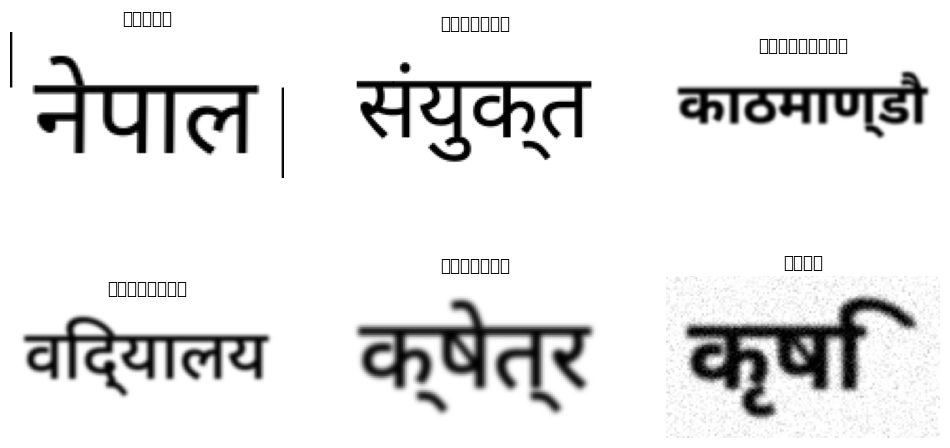

In [25]:

import matplotlib.pyplot as plt

fonts = [
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Regular.ttf",
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Medium.ttf",
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Bold.ttf",
    
]



test_strings = ["नेपाल", "संयुक्त", "काठमाण्डौ", "विद्यालय", "क्षेत्र", "कृषि"]

gen = SimpleOCRGenerator(
    strings=test_strings,
    fonts=fonts,
    size=48,
    img_height=64,
    padding=10,
    blur_prob=0.3,
    noise_prob=0.3,
    skew_prob=0.3,
)

images, labels = [], []

for img, label in gen:
    images.append(img)
    labels.append(label)

plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(labels[i])
    plt.axis("off")
plt.show()




In [26]:
!pip install cairocffi pangocffi
    

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
Using cached pycparser-2.23-py3-none-any.whl (118 kB)
  Created wheel for pangocffi: filename=pangocffi-0.13.0-py3-none-any.whl size=51883 sha256=eac0569b0e6b2f0bce13883a847ed84b60a901ebf65fb766ec4e6f9dd9214fdb
  Stored in directory: c:\users\gaurav\appdata\local\pip\cache\wheels\04\0f\78\9aac56646a9824b69aab31a34398457a081c4057f8d468c0f3
Successfully built pangocffi

   ---------------------------------------- 0/4 [pycparser]
   -------------------- ------------------- 2/4 [pangocffi]
   ------------------------------ --------- 3/4 [cairocffi]
   ---------------------------------------- 4/4 [cairocffi]



  DEPRECATION: Building 'pangocffi' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pangocffi'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [56]:
import cairocffi as cairo
import pangocffi
import pangocairo
from PIL import Image

# Function to render text using Pango and Cairo
def render_text_pango(text, font_paths, font_size, text_color=(0, 0, 0), bgcolor=(255, 255, 255)):
    # Create a Cairo surface (image)
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 600, 200)
    ctx = cairo.Context(surface)

    # Set background color (white in this case)
    ctx.set_source_rgb(bgcolor[0]/255, bgcolor[1]/255, bgcolor[2]/255)
    ctx.paint()

    # Create Pango layout (this will handle the text shaping and rendering)
    pc = pangocairo.Context(ctx)
    layout = pc.create_layout()
    layout.set_text(text)

    # Set the font for the text using Pango (specifying the font file path and size)
    # Select a font from the list of paths
    font_path = font_paths[0]  # You can change the index to select different fonts
    font_desc = pangocffi.FontDescription(f"@{font_path} {font_size}")
    layout.set_font_description(font_desc)

    # Set the text color (black in this case)
    ctx.set_source_rgb(text_color[0]/255, text_color[1]/255, text_color[2]/255)

    # Render the layout (this does the text drawing)
    pc.show_layout(layout)

    # Convert Cairo image to PIL image (for further manipulation or saving)
    img = Image.frombytes("RGBA", (surface.get_width(), surface.get_height()), surface.get_data(), "raw", "BGRA", 0, 1)

    return img

# Example font paths
fonts = [
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Regular.ttf",
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Medium.ttf",
    r"C:\Users\gaurav\OneDrive\Desktop\Computer Vision\fonts\NotoSansDevanagari-Bold.ttf",
]

# Test strings to render
test_strings = [
    "नेपाल", "संयुक्त", "काठमाण्डौ", "विद्यालय", "क्षेत्र", "कृषि"
]

# Rendering all test strings
for text in test_strings:
    img = render_text_pango(text, fonts, font_size=48)
    img.show()  # Display the image


ModuleNotFoundError: No module named 'pangocairo'

In [ ]:
from PIL import ImageFont,ImageDraw

font = ImageFont.truetype("fonts/NotoSansDevanagari-Regular.ttf", 48)
for s in ["नेपाल", "कृष्", "ि", "क्ष"]:
    print(s, "bbox:", font.getbbox(s))
    ImageDraw.text


नेपाल bbox: (0, 0, 100, 45)
कृष् bbox: (0, 14, 72, 57)
ि bbox: (0, 0, 36, 44)
क्ष bbox: (0, 14, 66, 57)


In [1]:
import cairo
import pangocairo

# Initialize a surface and context to draw on
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 600, 100)
context = cairo.Context(surface)

# Create a Pango layout
pango_layout = pangocairo.CairoContext(context).create_layout()

# Set the font to Mangal or Noto Sans Devanagari
pango_layout.set_font_description(Pango.FontDescription('Noto Sans Devanagari 40'))

# Set the text to be rendered
text = "नमस्ते दुनिया"

# Set the text for the layout
pango_layout.set_text(text)

# Set the context color
context.set_source_rgb(0, 0, 0)  # Black color

# Render the text
context.update_pango_layout(pango_layout)
context.show_layout(pango_layout)

# Save to an image file
surface.write_to_png('output.png')


ModuleNotFoundError: No module named 'cairo'